# Criando os nomes

In [105]:
import pandas as pd

In [106]:
# definindo a base de dados
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
pd.set_option('display.max_rows', 10)

In [107]:
# juntando as bases de dados em um único dataframe
nomes = pd.concat([nomes_f, nomes_m])['nome'].to_frame()
nomes.rename(columns={'nome': 'Nome'}, inplace=True)
nomes

,Nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [108]:
# colocando os nomes em capitalize
nomes['Nome'] = nomes['Nome'].apply(lambda nome: nome.capitalize())
nomes

,Nome
0,Maria
1,Ana
2,Francisca
3,Antonia
4,Adriana
...,...
195,Walter
196,Arlindo
197,Michael
198,Alvaro


# Incluindo o ID para os alunos

In [109]:
import numpy as np
np.random.seed(123)

In [110]:
# criando a nova coluna com valores aleatórios como ID
nomes['ID_Aluno'] = np.random.permutation(len(nomes))

In [111]:
nomes

,Nome,ID_Aluno
0,Maria,234
1,Ana,42
2,Francisca,303
3,Antonia,155
4,Adriana,342
...,...,...
195,Walter,230
196,Arlindo,98
197,Michael,322
198,Alvaro,382


In [112]:
# criando dominios de e-mail ficticios
dominios = ['@dominioemail.com', '@dominioservico.com']
nomes['Domínio'] = np.random.choice(dominios, len(nomes))
# cat concatena strings em Series 
nomes['E-mail'] = nomes['Nome'].str.cat(nomes['Domínio']).str.lower()
nomes

,Nome,ID_Aluno,Domínio,E-mail
0,Maria,234,@dominioemail.com,maria@dominioemail.com
1,Ana,42,@dominioservico.com,ana@dominioservico.com
2,Francisca,303,@dominioservico.com,francisca@dominioservico.com
3,Antonia,155,@dominioservico.com,antonia@dominioservico.com
4,Adriana,342,@dominioservico.com,adriana@dominioservico.com
...,...,...,...,...
195,Walter,230,@dominioemail.com,walter@dominioemail.com
196,Arlindo,98,@dominioservico.com,arlindo@dominioservico.com
197,Michael,322,@dominioemail.com,michael@dominioemail.com
198,Alvaro,382,@dominioservico.com,alvaro@dominioservico.com


# Criando a tabela Cursos

In [113]:
!pip3 install html5lib
!pip3 install lxml

In [114]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
cursos = cursos[0]
cursos.columns = ['Cursos']
cursos

,Cursos
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
...,...
15,Estatística básica
16,Internet das coisas
17,Programação funcional
18,Boas práticas em Java


In [115]:
# adicionando um ID para cada curso
cursos['ID'] = cursos.index + 1
cursos

,Cursos,ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
...,...,...
15,Estatística básica,16
16,Internet das coisas,17
17,Programação funcional,18
18,Boas práticas em Java,19


In [116]:
cursos.set_index('ID')

,Cursos
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
...,...
16,Estatística básica
17,Internet das coisas
18,Programação funcional


# Matriculando os alunos nos cursos

In [117]:
nomes['Matrículas'] = np.ceil(np.random.exponential(size=len(nomes)) * 1.5).astype(int)
nomes

,Nome,ID_Aluno,Domínio,E-mail,Matrículas
0,Maria,234,@dominioemail.com,maria@dominioemail.com,3
1,Ana,42,@dominioservico.com,ana@dominioservico.com,1
2,Francisca,303,@dominioservico.com,francisca@dominioservico.com,1
3,Antonia,155,@dominioservico.com,antonia@dominioservico.com,3
4,Adriana,342,@dominioservico.com,adriana@dominioservico.com,1
...,...,...,...,...,...
195,Walter,230,@dominioemail.com,walter@dominioemail.com,1
196,Arlindo,98,@dominioservico.com,arlindo@dominioservico.com,1
197,Michael,322,@dominioemail.com,michael@dominioemail.com,1
198,Alvaro,382,@dominioservico.com,alvaro@dominioservico.com,3


In [120]:
nomes['Matrículas'].describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: Matrículas, dtype: float64

In [124]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


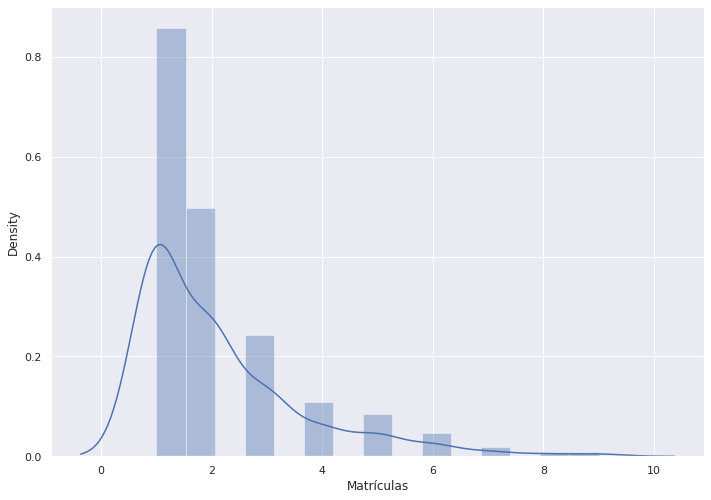

In [125]:
sns.distplot(nomes['Matrículas'])

In [126]:
nomes['Matrículas'].value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
9      2
8      2
Name: Matrículas, dtype: int64